
<center><u><H1>Latent Semantic Analysis (LSA)</H1></u></center>

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans, MiniBatchKMeans

In [2]:
categories = ['rec.autos', 'sci.electronics', 'comp.graphics']

In [3]:
data = fetch_20newsgroups(subset='all', categories=categories,
                          shuffle=True, random_state=2017)

In [4]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data.data)

In [5]:
km = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1)
svd = TruncatedSVD(2000) #Desired dimensionality of output data
lsa = make_pipeline(svd, Normalizer(copy=False))

In [6]:
X = lsa.fit_transform(X)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
explained_variance = svd.explained_variance_ratio_.sum()
explained_variance

0.9330345458271098

In [8]:
terms = vectorizer.get_feature_names()
original_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_centroids.argsort()[:,::-1]

In [9]:
for i in range(3):
    print("Cluster %d:" % i)
    for ix in order_centroids[i, :10]:
        print(' %s' % terms[ix])

Cluster 0:
 edu
 com
 lines
 subject
 organization
 university
 host
 posting
 nntp
 ca
Cluster 1:
 graphics
 edu
 uk
 image
 ac
 program
 file
 files
 bit
 3d
Cluster 2:
 car
 com
 edu
 cars
 writes
 article
 engine
 just
 oil
 subject


In [10]:
kmini = MiniBatchKMeans(n_clusters=3, init='k-means++', n_init=1,
                        init_size=1000,
                       batch_size=1000
                       )

In [11]:
kmini_model = kmini.fit(X)

In [12]:
original_centroids = svd.inverse_transform(kmini_model.cluster_centers_)
order_centroids = original_centroids.argsort()[:,::-1]

In [14]:
for i in range(3):
    print("Cluster %d:" % i)
    for ix in order_centroids[i, :10]:
        print(' %s' % terms[ix])

Cluster 0:
 edu
 university
 lines
 subject
 host
 organization
 posting
 nntp
 graphics
 thanks
Cluster 1:
 com
 car
 edu
 writes
 article
 just
 lines
 subject
 hp
 organization
Cluster 2:
 uk
 ac
 image
 edu
 copy
 bit
 program
 cs
 files
 university


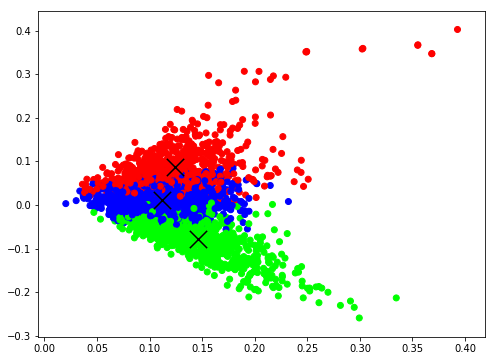

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
centroids = km.cluster_centers_
f, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:,0], X[:,1],cmap=plt.cm.brg, c=km.labels_)
ax.scatter(centroids[:,0], centroids[:,1], marker='x', s=300, linewidths=5, c='black')

## References:

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer
